In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade seaborn

data = pd.read_csv('creditcard.csv')
data.head()
data.shape


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


(284807, 31)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.duplicated().any()

True

In [5]:
data = data.drop_duplicates()

In [6]:
data.shape

(283726, 31)

In [8]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# EDA

In [41]:
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [100]:
# Splitting the data for analysis

legit_data = (data[data['Class'] == 0])
fraud_data = (data[data['Class'] == 1])
#fraud_print(legit_data.shape,fraud_data.shape)
print(legit_data.shape,fraud_data.shape)

(284315, 31) (492, 31)


In [101]:
# Statistical Analysis

print(legit_data['Amount'].describe())
print(fraud_data['Amount'].describe())


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [13]:
# Compare the values for both the legit and fraud transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [79]:
print(data['Time'].unique())

[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]


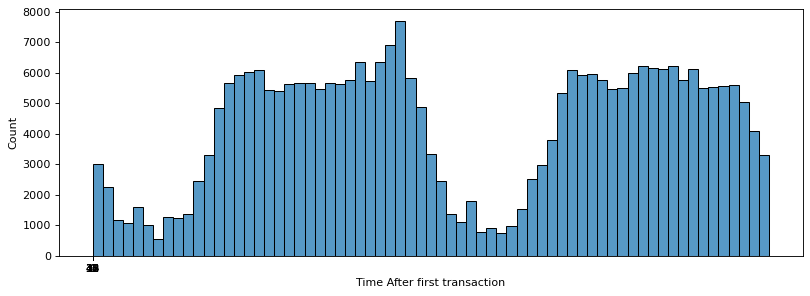

In [105]:
plt.figure(figsize=(12,4),dpi = 80)
sns.histplot(data['Time'],bins = 48)
#plt.xlim([0,54])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')
plt.show()

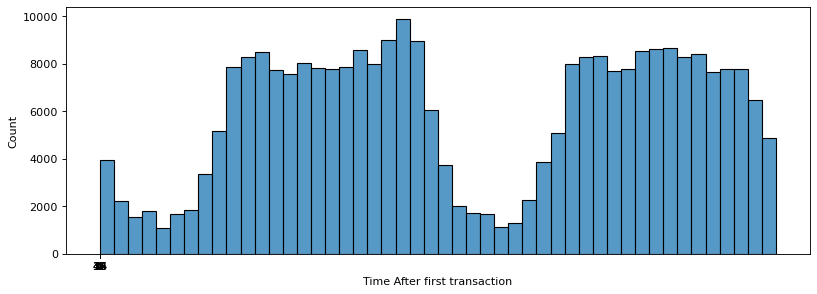

In [109]:
plt.figure(figsize=(12,4),dpi = 80)
sns.histplot(legit_data['Time'],bins = 48)
#plt.xlim([0,54])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')
plt.show()

C:\Users\Seena.Tijo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Time After first transaction')

<Figure size 960x320 with 0 Axes>

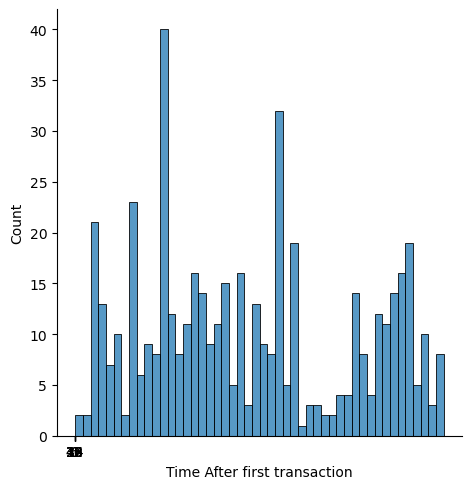

In [108]:
plt.figure(figsize=(12,4),dpi = 80)
sns.displot(fraud_data['Time'],bins = 48)
#plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After first transaction')

<Axes: >

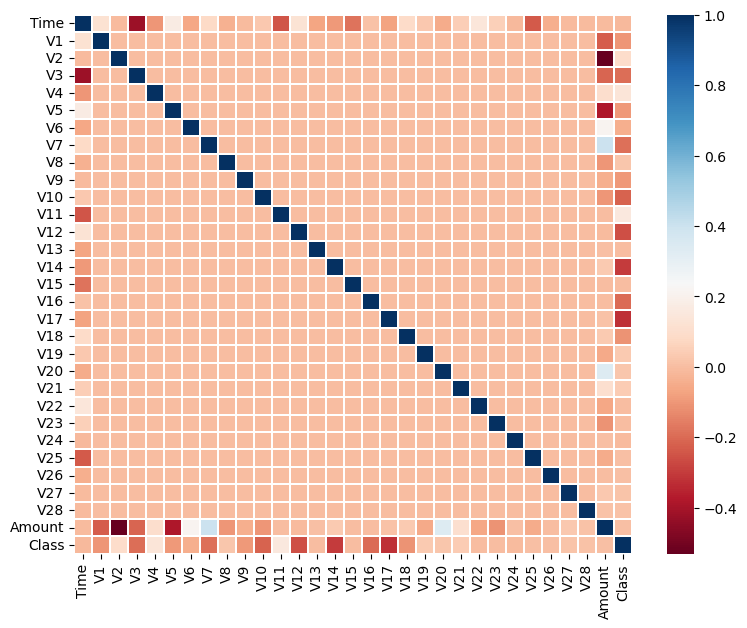

In [114]:
corr = data.corr()
fig,ax = plt.subplots(figsize= (9,7))
sns.heatmap(corr,linewidths=0.1,cmap = "RdBu", ax = ax)

Class
0    283253
1       473
Name: count, dtype: int64


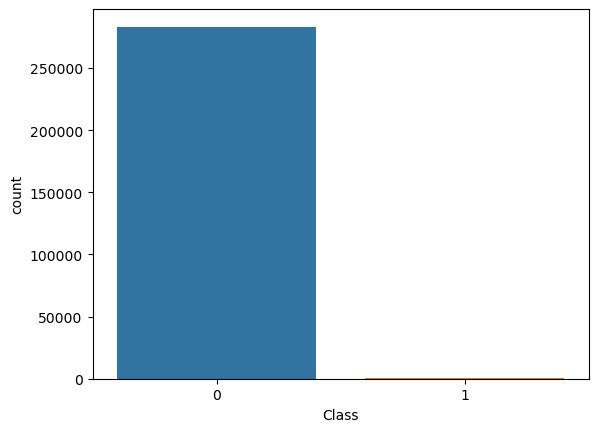

In [15]:

# Checking for imbalance

print(data['Class'].value_counts())

sns.countplot(data=data, x='Class')
plt.show()

In [23]:
# It is a highly imbalanced data - We will apply the undersampling technique to balance the dataset.Build dataset
# with similar distribution of normal and fraudlent transactions.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

legit_sample = legit_data.sample(n = 473)
new_data = pd.concat([legit_sample,fraud_data],axis = 0)

new_data['Class'].value_counts()


Class
0    473
1    473
Name: count, dtype: int64

In [26]:
#Split the dataset into features and target
X = new_data.drop('Class',axis = 1)
Y = new_data['Class']
print(X,Y)


            Time        V1        V2        V3        V4        V5        V6  \
76466    56582.0  1.381661 -0.618881 -0.053698 -0.980531 -0.844745 -0.918268   
45050    42185.0  1.556857 -0.976690 -0.011380 -1.719182 -0.854701 -0.012326   
254469  156745.0 -1.189404 -0.591269 -0.600846  3.512289 -1.390089  1.752359   
79395    58007.0  1.236015 -0.783039  0.324139 -0.714564 -0.729514  0.290752   
127855   78494.0 -0.519784  0.840272  0.939329 -0.108621  0.727277 -0.483988   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [34]:
# Splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,test_size=0.2 ,random_state = 2)
print(X.shape,X_train.shape,X_test.shape)

(946, 30) (756, 30) (190, 30)


In [35]:
#Build the model
LR_model = LogisticRegression()
#Training the model with training data
LR_model.fit(X_train,Y_train)


C:\Users\Seena.Tijo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Model Evaluation

#Training Data accuracy
training_data_prediction = LR_model.predict(X_train)

training_data_acc = accuracy_score(training_data_prediction,Y_train)
training_data_acc

0.9325396825396826

In [39]:
# Test data accuracy
test_data_prediction = LR_model.predict(X_test)
test_data_acc = accuracy_score(test_data_prediction,Y_test)
test_data_acc

0.9421052631578948